### Q1
Picture story telling
Please illustrate what you observe from Figure 1 and discuss what you find. 


#### A

**Observations**:
- Trends Over Time: Across all graphs, there is a general trend that shows as relative humidity increases, the average foggy hours also increase, reaching a peak around 80-90% relative humidity, then decrease slightly as humidity approaches 100%.

- Comparison Across Decades: There is a noticeable shift in the peak of average foggy hours over the decades. In the early decades (1961–1980), the peak foggy hours were lower compared to the later decades (1981–2000).

- Diurnal Variation:

    - During daytime, fog hours peak at a lower relative humidity level compared to nighttime.
    - During nighttime, the peak fog hours occur at higher relative humidity levels and the average number of foggy hours is higher compared to daytime.
    - Decrease in Recent Years: The red line, representing the years 2001–2005, shows a significant reduction in the average number of foggy hours across all levels of relative humidity for both daytime and nighttime.

**Discussion**:
- The relationship between relative humidity and fog occurrence is clearly nonlinear, with a propensity for fog to form most frequently at high but not complete saturation levels. This could be due to the fact that fog formation requires a delicate balance of humidity and temperature, and perhaps slightly lower than 100% humidity is optimal for fog formation in the observed regions.

- The reduction in foggy hours in recent years could be indicative of climatic changes, urbanization effects, or other environmental changes that influence local weather patterns.

- The difference in fog formation between day and night can be attributed to the diurnal temperature variation which affects the saturation level and dew point.

### Q2
Figure 2 (below) is the covariance for the North-South Velocity (v wind) and Temperature at 850 hPa calculated from 1981 to 2000. Please discuss the meanings in this figure’s contours using what we learned from the class about the covariance.

The contours in the provided figure represent the covariance between North-South Velocity (v wind) and Temperature at the 850 hPa pressure level from 1981 to 2000. Here's how to interpret these contours:

1. **Positive Covariance (Yellow to Brown Contours)**: Areas with positive values indicate a positive covariance, which means that in these regions, as the North-South velocity increases, the temperature tends to increase as well. This could imply a transport of warm air northwards or cold air southwards, depending on the prevailing wind direction in the specific region. These regions are predominantly found in the Northern Hemisphere according to the figure.

2. **Negative Covariance (Blue Contours)**: Conversely, areas with negative values show a negative covariance. In these regions, an increase in North-South velocity corresponds to a decrease in temperature. This could be due to colder air moving southward or warmer air moving northward, effectively reducing the temperature. This is primarily observed in the Southern Hemisphere as shown in the figure.

3. **Zero or Near Zero Covariance (White Areas)**: Regions without strong contours or where the contour lines are around zero suggest no significant linear relationship between the North-South velocity and temperature. In these areas, the movements of air masses do not strongly affect the temperature or, the temperature changes independently of the north-south air movements.

4. **Magnitude of Covariance**: The strength of the covariance is indicated by the contour levels. High absolute values (either positive or negative) suggest a strong relationship between the velocity and temperature changes, whereas values close to zero suggest a weak relationship.

5. **Std and Avg Indicators**: The standard deviation (std) indicates the variability of the covariance values, and the average (avg) gives a central value. A std of 7.577 alongside an avg of 1.398 indicates that while the average covariance is positive, there is considerable variation across the entire dataset.

6. **Max and Min Indicators**: The maximum (max) and minimum (min) values denote the extremes of covariance within the dataset. With max and min values being positive, it suggests that the strongest relationships across the dataset are all of positive covariance, albeit the min value being significantly smaller than the max.

Overall, this figure provides insight into how the movement of air masses at 850 hPa could potentially influence temperature distribution and vice versa. It's an indicator of dynamic atmospheric processes over the 20-year period. Understanding these patterns is crucial for climatologists and meteorologists as it helps in understanding weather patterns and climate dynamics.

### Q3

Our research team randomly collects 45 samples from Tamsui River. We sample 1 liter of water for each sample and measure the oxygen concentration in the water. The average oxygen concentration is 4.62 mg/liter with standard deviation of 0.92 mg/liter. 

Q: whether the measurement indicates strong evidence that the average oxygen concentration is below 5 mg/liter? Please clearly state your hypothesis and perform the test.


#### Hypotheses
Null Hypothesis (H0): The average oxygen concentration in the Tamsui River is 5 mg/liter. 

Alternative Hypothesis (H1): The average oxygen concentration in the Tamsui River is less than 5 mg/liter. 

This is a one-tailed test since the alternative hypothesis specifically addresses whether the mean concentration is less than 5 mg/liter.

In [25]:
# Q3
import numpy as np
from scipy import stats

# Given data
sample_mean = 4.62
population_mean = 5
sample_std = 0.92
n = 45

# Calculating the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculating the p-value for a one-tailed test
p_value = stats.t.cdf(t_statistic, df)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -2.7708
P-value: 0.0041


### Q5
Please use the data from below link for this question.

- plot the time series of Ts from 1950/Jan to 2020/Dec with correct x axis.
- calculate the linear trend (y=ax+b) of the above figure, and plot the trend line (overlap with the figure 5.a). Whata is the R2 value for the regression line?
- calculate the p-value for the linear trend (you can either using the built-in function in python/matlab or calculate following the class notes)
- what does the p-value mean?


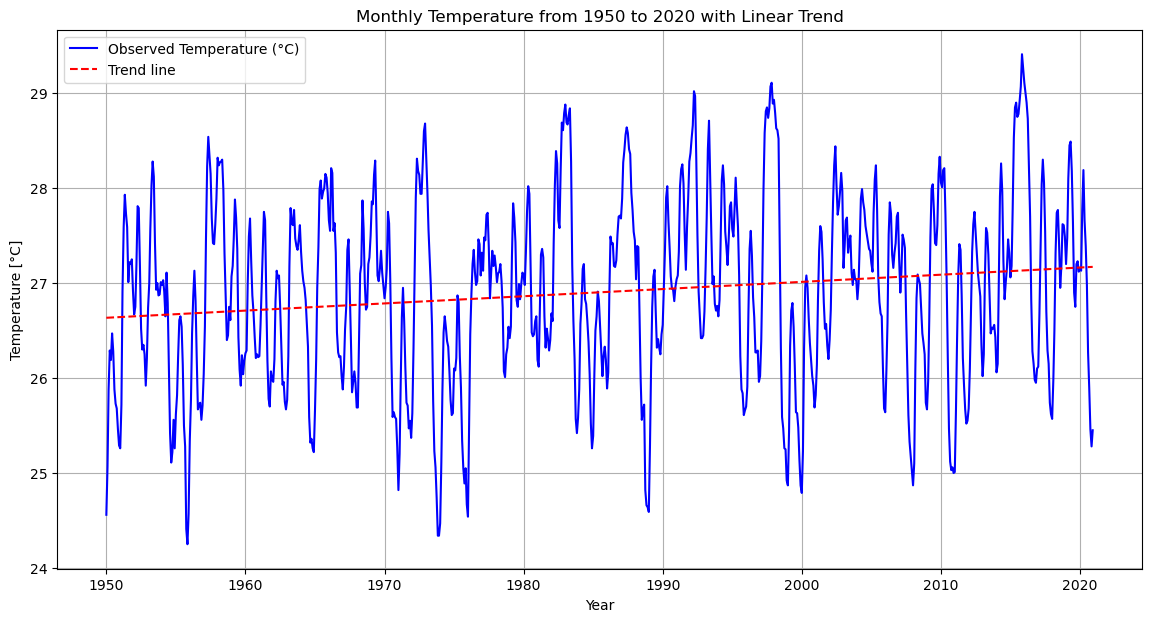

Regression Line: y = 0.0000x + 11.9012
R value for the regression line: 0.1578
R squared value for the regression line: 0.0249
P-value for the linear trend: 3.679028747261335e-06
The p-value measures the probability that the observed data could have occurred by random chance under the null hypothesis (no trend). A small p-value (typically < 0.05) suggests rejecting the null hypothesis, indicating the trend is statistically significant.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
file_path = '/Users/ludong/PROGRAM/112-2/Statistics/考古/detrend.nino34.ascii.2.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['Year', 'Month', 'Temperature'])

# Create a datetime column from the year and month
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Convert Date to a numeric format for regression analysis
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(data['Date_ordinal'], data['Temperature'])

# Calculate the trend values using the regression results
data['Trend'] = intercept + slope * data['Date_ordinal']

# Plotting the time series of temperature
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Temperature'], label='Observed Temperature (°C)', color='blue')
plt.plot(data['Date'], data['Trend'], label='Trend line', color='red', linestyle='--')
plt.title('Monthly Temperature from 1950 to 2020 with Linear Trend')
plt.xlabel('Year')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.grid()
plt.show()

# Print the regression results
print(f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')
print(f'R value for the regression line: {r_value:.4f}')
print(f'R squared value for the regression line: {r_value**2:.4f}')
print(f'P-value for the linear trend: {p_value}')

# Explanation of what the p-value means
print("The p-value measures the probability that the observed data could have occurred by random chance under the null hypothesis (no trend). A small p-value (typically < 0.05) suggests rejecting the null hypothesis, indicating the trend is statistically significant.")


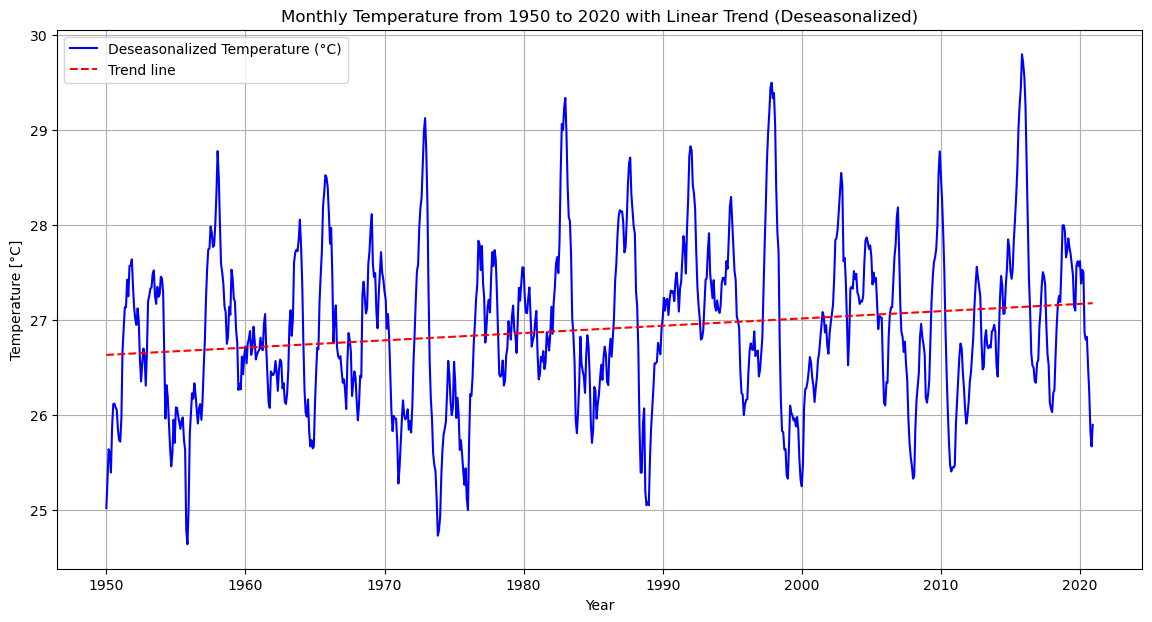

Regression Line: y = 0.0000x + 11.6674
R value for the regression line: 0.1810855407591305
R squared value for the regression line: 0.03279197307202671
P-value for the linear trend: 1.026259518899825e-07


In [3]:
# Remove the seasonal cycle
data['Deseasonal'] = data['Temperature'] - seasonal_decompose(data['Temperature'], model='additive', period=12).seasonal

# Perform linear regression using scipy's linregress on deseasonalized data
slope_de, intercept_de, r_value_de, p_value_de, std_err_de = linregress(data['Date_ordinal'], data['Deseasonal'])

# Calculate the trend values using the regression results
data['DeseasonalTrend'] = intercept_de + slope_de * data['Date_ordinal']

# Plotting the time series of temperature
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Deseasonal'], label='Deseasonalized Temperature (°C)', color='blue')
plt.plot(data['Date'], data['DeseasonalTrend'], label='Trend line', color='red', linestyle='--')
plt.title('Monthly Temperature from 1950 to 2020 with Linear Trend (Deseasonalized)')
plt.xlabel('Year')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.grid()
plt.show()

# Print the regression results
print(f'Regression Line: y = {slope_de:.4f}x + {intercept_de:.4f}')
print(f'R value for the regression line: {r_value_de}')
print(f'R squared value for the regression line: {r_value_de**2}')
print(f'P-value for the linear trend: {p_value_de}')

### C.F.

The t-value in the context of regression analysis is used to determine whether a particular coefficient is significantly different from zero. This helps in understanding whether there is a significant linear relationship between the independent variable and the dependent variable. To calculate the t-value for a linear regression coefficient, you can use the following formula:

$ t = \frac{\hat{\beta}}{SE(\hat{\beta})} $

Where:
- $ \hat{\beta} $ is the estimated coefficient (slope in simple linear regression).
- $ SE(\hat{\beta}) $ is the standard error of the estimated coefficient.

The standard error of the coefficient is calculated from the residual standard error (RSE) of the regression and the data points:

$ SE(\hat{\beta}) = \frac{RSE}{\sqrt{\sum{(x_i - \bar{x})^2}}} $

Where:
- $ RSE $ is the residual standard error of the regression.
- $ x_i $ are the independent variable values.
- $ \bar{x} $ is the mean of the independent variable values.

In a simple linear regression, RSE can be calculated as follows:

$ RSE = \sqrt{\frac{RSS}{n-2}} $

Where:
- $ RSS $ is the residual sum of squares.
- $ n $ is the number of observations.

And the residual sum of squares is calculated as:

$ RSS = \sum{(y_i - \hat{y}_i)^2} $

Where:
- $ y_i $ are the actual dependent variable values.
- $ \hat{y}_i $ are the predicted dependent variable values from the regression.

Once you have the t-value, you can compare it to the critical value from the t-distribution with $ n-2 $ degrees of freedom to determine statistical significance. If the absolute value of the t-value is greater than the critical value (for your chosen alpha level, typically 0.05), then the coefficient is statistically significant.

Let's say you've already run a regression model and you have the slope (coefficient) and its standard error, you can directly compute the t-value using these values. If you need to calculate it step by step from a dataset, you would need to perform the regression first and then calculate the residuals and their standard error to get the t-value.